In [1]:
import os
from scipy.io import loadmat

# Path to DEAP dataset folder
data_folder = '/Users/pabitra/Documents/Version Control System/Thesis/DEAP Dataset'

def read_data(filename):
    """Reads DEAP .mat file and returns the loaded dictionary."""
    data = loadmat(filename)
    return data

# Generate list of file names
files = [f"s{n:02d}.mat" for n in range(1, 33)]
print(files)

# Full file paths
file_paths = [os.path.join(data_folder, f) for f in files]

# Example: load first file
for path in file_paths:
    if os.path.isfile(path):
        print(f"Loading {path}")
        mat_data = read_data(path)
        print(f"  Keys: {mat_data.keys()}")
    else:
        print(f"File not found: {path}")


['s01.mat', 's02.mat', 's03.mat', 's04.mat', 's05.mat', 's06.mat', 's07.mat', 's08.mat', 's09.mat', 's10.mat', 's11.mat', 's12.mat', 's13.mat', 's14.mat', 's15.mat', 's16.mat', 's17.mat', 's18.mat', 's19.mat', 's20.mat', 's21.mat', 's22.mat', 's23.mat', 's24.mat', 's25.mat', 's26.mat', 's27.mat', 's28.mat', 's29.mat', 's30.mat', 's31.mat', 's32.mat']
Loading /Users/pabitra/Documents/Version Control System/Thesis/DEAP Dataset/s01.mat
  Keys: dict_keys(['__header__', '__version__', '__globals__', 'labels', 'data'])
Loading /Users/pabitra/Documents/Version Control System/Thesis/DEAP Dataset/s02.mat
  Keys: dict_keys(['__header__', '__version__', '__globals__', 'labels', 'data'])
Loading /Users/pabitra/Documents/Version Control System/Thesis/DEAP Dataset/s03.mat
  Keys: dict_keys(['__header__', '__version__', '__globals__', 'labels', 'data'])
Loading /Users/pabitra/Documents/Version Control System/Thesis/DEAP Dataset/s04.mat
  Keys: dict_keys(['__header__', '__version__', '__globals__', 'l

In [2]:
import os
from scipy.io import loadmat

# Path to DEAP dataset folder
data_folder = '/Users/pabitra/Documents/Version Control System/Thesis/DEAP Dataset'

# List of filenames (s01.mat to s32.mat)
files = [f"{n:02d}" for n in range(1, 33)]

labels = []
data = []

for i in files:
    file_path = os.path.join(data_folder, f"s{i}.mat")
    
    if not os.path.isfile(file_path):
        print(f"File not found: {file_path}")
        continue
    
    # Load .mat file
    d = loadmat(file_path)
    
    # Append labels and data
    labels.append(d['labels'])
    data.append(d['data'])

print(f"Loaded {len(data)} files successfully.")


Loaded 32 files successfully.


In [3]:
import os
import numpy as np
from scipy.io import loadmat

# Path to DEAP dataset folder
data_folder = '/Users/pabitra/Documents/Version Control System/Thesis/DEAP Dataset'

labels = []
data = []

# Load all 32 subjects
for n in range(1, 33):
    file_path = os.path.join(data_folder, f"s{n:02d}.mat")
    
    if not os.path.isfile(file_path):
        print(f"File not found: {file_path}")
        continue
    
    d = loadmat(file_path)
    labels.append(d['labels'])  # (40, 4)
    data.append(d['data'])      # (40, 40, 8064)

# Convert lists to arrays
labels = np.array(labels)  # (32, 40, 4)
data = np.array(data)      # (32, 40, 40, 8064)

print("Original shapes:")
print(labels.shape)  # (32, 40, 4)
print(data.shape)    # (32, 40, 40, 8064)

# Reshape to combine users & trials
labels = labels.reshape(1280, 4)         # (1280, 4)
data = data.reshape(1280, 40, 8064)      # (1280, 40, 8064)

print("After reshape:")
print(labels.shape)  # (1280, 4)
print(data.shape)    # (1280, 40, 8064)

# Extract only EEG channels (first 32 channels)
eeg_data = data[:, :32, :]  # (1280, 32, 8064)
print("EEG data shape:")
print(eeg_data.shape)       # (1280, 32, 8064)


Original shapes:
(32, 40, 4)
(32, 40, 40, 8064)
After reshape:
(1280, 4)
(1280, 40, 8064)
EEG data shape:
(1280, 32, 8064)


In [4]:
import os
import numpy as np
import pandas as pd
from scipy.io import loadmat

# Path to DEAP dataset folder
data_folder = '/Users/pabitra/Documents/Version Control System/Thesis/DEAP Dataset'

labels = []
data = []

# Load all 32 subjects
for n in range(1, 33):
    file_path = os.path.join(data_folder, f"s{n:02d}.mat")
    
    if not os.path.isfile(file_path):
        print(f"File not found: {file_path}")
        continue
    
    d = loadmat(file_path)
    labels.append(d['labels'])  # (40, 4)
    data.append(d['data'])      # (40, 40, 8064)

# Convert lists to arrays
labels = np.array(labels)  # (32, 40, 4)
data = np.array(data)      # (32, 40, 40, 8064)

# Reshape
labels = labels.reshape(1280, 4)         # (1280, 4)
data = data.reshape(1280, 40, 8064)      # (1280, 40, 8064)

# Extract EEG channels (first 32)
eeg_data = data[:, :32, :]               # (1280, 32, 8064)

# Create DataFrame for labels
df_label = pd.DataFrame({
    'Valence': labels[:, 0],
    'Arousal': labels[:, 1],
    'Dominance': labels[:, 2],
    'Liking': labels[:, 3]
})

print(df_label.head())


   Valence  Arousal  Dominance  Liking
0     7.71     7.60       6.90    7.83
1     8.10     7.31       7.28    8.47
2     8.58     7.54       9.00    7.08
3     4.94     6.01       6.12    8.06
4     6.96     3.92       7.19    6.05


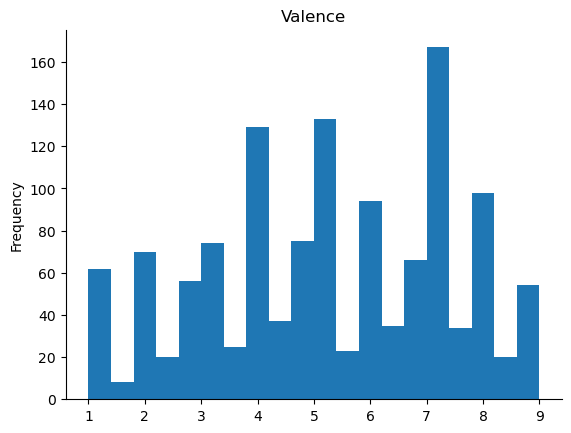

In [6]:
from matplotlib import pyplot as plt
df_label['Valence'].plot(kind='hist', bins=20, title='Valence')
plt.gca().spines[['top', 'right',]].set_visible(False)

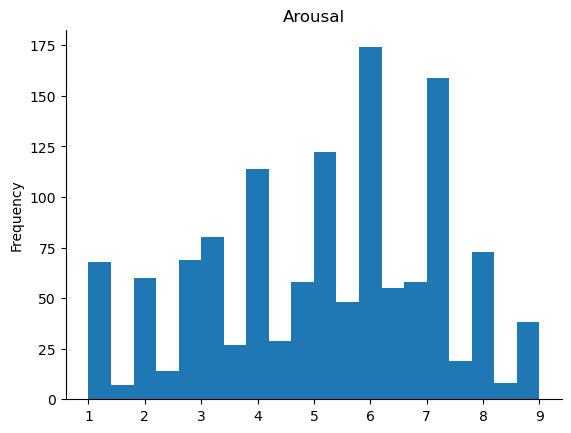

In [7]:
from matplotlib import pyplot as plt
df_label['Arousal'].plot(kind='hist', bins=20, title='Arousal')
plt.gca().spines[['top', 'right',]].set_visible(False)

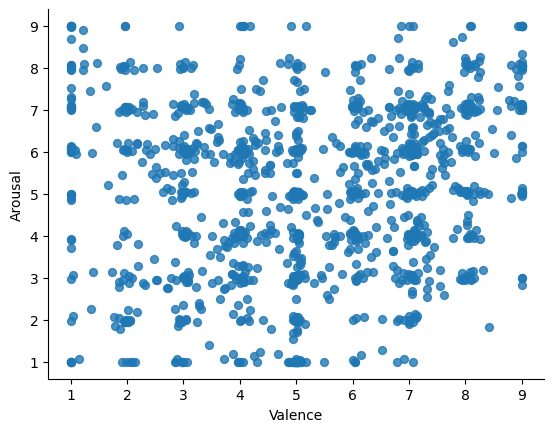

In [8]:
from matplotlib import pyplot as plt
df_label.plot(kind='scatter', x='Valence', y='Arousal', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

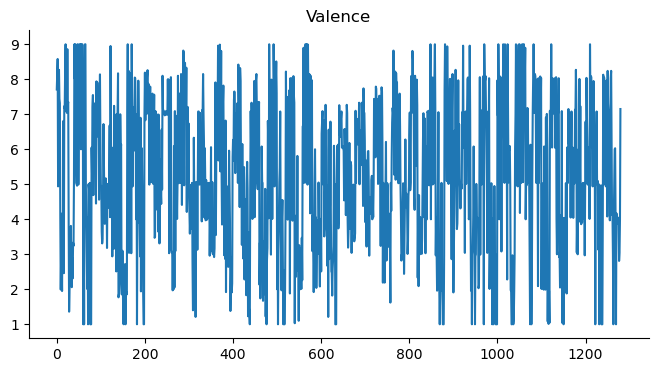

In [9]:
from matplotlib import pyplot as plt
df_label['Valence'].plot(kind='line', figsize=(8, 4), title='Valence')
plt.gca().spines[['top', 'right']].set_visible(False)

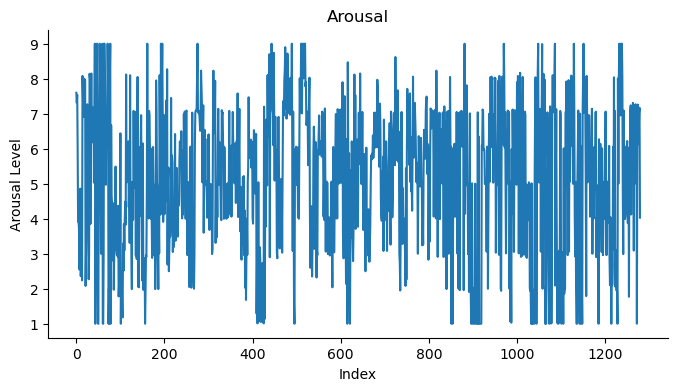

In [10]:
from matplotlib import pyplot as plt

# Assuming df_label is already defined and contains the 'Arousal' column
df_label['Arousal'].plot(kind='line', figsize=(8, 4), title='Arousal')
plt.xlabel('Index')  # Add a label to the x-axis
plt.ylabel('Arousal Level')  # Add a label to the y-axis
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

In [11]:
df_label.describe()

,Valence,Arousal,Dominance,Liking
count,1280.000000,1280.000000,1280.000000,1280.000000
mean,5.254313,5.156711,5.382750,5.518133
std,2.130816,2.020499,2.096321,2.282780
min,1.000000,1.000000,1.000000,1.000000
25%,3.867500,3.762500,3.932500,3.960000
50%,5.040000,5.230000,5.240000,6.050000
75%,7.050000,6.950000,7.040000,7.090000
max,9.000000,9.000000,9.000000,9.000000


In [12]:
df_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1280 entries, 0 to 1279
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Valence    1280 non-null   float64
 1   Arousal    1280 non-null   float64
 2   Dominance  1280 non-null   float64
 3   Liking     1280 non-null   float64
dtypes: float64(4)
memory usage: 40.1 KB


In [13]:
label_name = ["valence","arousal","dominance","liking"]
labels_valence = []
labels_arousal = []
labels_dominance = []
labels_liking = []
for la in labels:
    l = []
    if la[0]>5:
        labels_valence.append(1)
    else:
        labels_valence.append(0)
    if la[1]>5:
        labels_arousal.append(1)
    else:
        labels_arousal.append(0)
    if la[2]>5:
        labels_dominance.append(1)
    else:
        labels_dominance.append(0)
    if la[3]>6:
        labels_liking.append(1)
    else:
        labels_liking.append(0)

In [14]:
from scipy.signal import welch
from scipy.integrate import simps
def bandpower(data, sf, band):
    band = np.asarray(band)
    low, high = band
    nperseg = (2 / low) * sf
    freqs, psd = welch(data, sf, nperseg=nperseg)
    freq_res = freqs[1] - freqs[0]
    idx_band = np.logical_and(freqs >= low, freqs <= high)
    bp = simps(psd[idx_band], dx=freq_res)
    return bp

def get_band_power(people, channel, band):
    bd = (0,0)
    if (band == "delta"):
        bd = (0.5,4)
    if (band == "theta"):
        bd = (4,8)
    elif (band == "alpha"):
        bd = (8,12)
    elif (band == "beta"):
        bd = (12,30)
    elif (band == "gamma"):
        bd = (30,64)
    return bandpower(eeg_data[people,channel], 128, bd)

In [15]:
eeg_band = []
for i in range (len(eeg_data)):
    for j in range (len(eeg_data[0])):
        eeg_band.append(get_band_power(i,j,"delta"))
        eeg_band.append(get_band_power(i,j,"theta"))
        eeg_band.append(get_band_power(i,j,"alpha"))
        eeg_band.append(get_band_power(i,j,"beta"))
        eeg_band.append(get_band_power(i,j,"gamma"))

/var/folders/vq/zb4tsz1149z_01624_vx5k700000gn/T/ipykernel_2113/322418473.py:10: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  bp = simps(psd[idx_band], dx=freq_res)


In [16]:
eeg_band = np.array(eeg_band)
eeg_band = eeg_band.reshape((1280,160)) # 5×32
print(eeg_band.shape)
np.save("eeg_band.npy", eeg_band)
eeg_band = np.load("eeg_band.npy")
print(eeg_band.shape)

(1280, 160)
(1280, 160)


In [17]:
data_x = eeg_band
print(data_x.shape)

# label_y = labels_valence
label_y = labels_arousal
# label_y = labels_dominance
# label_y = labels_liking
trainscores = []
testscores = []
X = data_x
from sklearn import preprocessing

poly = preprocessing.PolynomialFeatures(degree=2)
X = poly.fit_transform(X)

min_max_scaler = preprocessing.MinMaxScaler()
X=min_max_scaler.fit_transform(X)
# X=preprocessing.scale(X)
X = preprocessing.normalize(X, norm='l1')
print(X.shape)

from sklearn.decomposition import PCA
pca = PCA(n_components=1000)
X=pca.fit_transform(X)
print(X.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, label_y)

(1280, 160)
(1280, 13041)
(1280, 1000)


In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train,)
train_score=knn.score(X_train,y_train)
test_score=knn.score(X_test,y_test)
print("train_score：", train_score)
print("test_score：", test_score)
trainscores.append(train_score)
testscores.append(test_score)

train_score： 0.7114583333333333
test_score： 0.61875


In [19]:
X = data_x
from sklearn import preprocessing

# poly = preprocessing.PolynomialFeatures(degree=2)
# X = poly.fit_transform(X)

min_max_scaler = preprocessing.MinMaxScaler()
X=min_max_scaler.fit_transform(X)
# X=preprocessing.scale(X)
# X = preprocessing.normalize(X, norm='l1')
print(X.shape)

# Dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
X=pca.fit_transform(X)
print(X.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_x, label_y)
from sklearn import tree
dtree = tree.DecisionTreeClassifier(max_depth=20,min_samples_split=4)
dtree = dtree.fit(X_train, y_train)
train_score=dtree.score(X_train,y_train)
test_score=dtree.score(X_test,y_test)
print("train_score：", train_score)
print("test_score：", test_score)
trainscores.append(train_score)
testscores.append(test_score)

(1280, 160)
(1280, 100)
train_score： 0.9885416666666667
test_score： 0.6


In [20]:
X = data_x
from sklearn import preprocessing

# poly = preprocessing.PolynomialFeatures(degree=2)
# X = poly.fit_transform(X)

min_max_scaler = preprocessing.MinMaxScaler()
X=min_max_scaler.fit_transform(X)
# X=preprocessing.scale(X)
# X = preprocessing.normalize(X, norm='l1')
print(X.shape)

# from sklearn.decomposition import PCA
# pca = PCA(n_components=100)
# X=pca.fit_transform(X)
# print(X.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_x, label_y)


from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=50,max_depth=20,min_samples_split=5)
rf=rf.fit(X_train, y_train)
train_score=rf.score(X_train,y_train)
test_score=rf.score(X_test,y_test)
print("train_score：", train_score)
print("test_score：", test_score)
trainscores.append(train_score)
testscores.append(test_score)

(1280, 160)
train_score： 0.996875
test_score： 0.584375


In [21]:
X = data_x
from sklearn import preprocessing

poly = preprocessing.PolynomialFeatures(degree=2)
X = poly.fit_transform(X)

# min_max_scaler = preprocessing.MinMaxScaler()
# X=min_max_scaler.fit_transform(X)
X=preprocessing.scale(X)
# X = preprocessing.normalize(X, norm='l2')
print(X.shape)

# from sklearn.decomposition import PCA
# pca = PCA(n_components=20)
# X=pca.fit_transform(X)
# print(X.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_x, label_y)
from sklearn.svm import SVC
svc = SVC(kernel='rbf',C = 0.1)
svc.fit(X_train, y_train)
train_score=svc.score(X_train,y_train)
test_score=svc.score(X_test,y_test)
print("train_score：", train_score)
print("test_score：", test_score)
trainscores.append(train_score)
testscores.append(test_score)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_data.py:261: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


(1280, 13041)
train_score： 0.5614583333333333
test_score： 0.61875


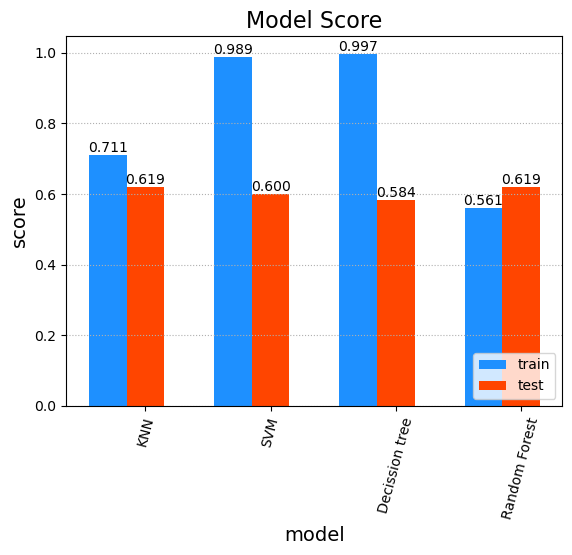

In [23]:
model_name = ["KNN","SVM","Decission tree","Random Forest"]
import matplotlib.pyplot as plt
plt.title('Model Score', fontsize=16)
plt.xlabel('model', fontsize=14)
plt.ylabel('score', fontsize=14)
plt.grid(linestyle=':', axis='y')
x = np.arange(4)
a = plt.bar(x - 0.3, trainscores, 0.3, color='dodgerblue', label='train', align='center')
b = plt.bar(x, testscores, 0.3, color='orangered', label='test', align='center')
# Set up labels
for i in a + b:
    h = i.get_height()
    plt.text(i.get_x() + i.get_width() / 2, h, '%.3f' % h, ha='center', va='bottom')
plt.xticks(x,model_name,rotation=75)
plt.legend(loc='lower right')
plt.show()

In [24]:
# Hjorth parameters calculation
def hjorth_parameters(data):
    first_deriv = np.diff(data)
    second_deriv = np.diff(first_deriv)
    var_zero = np.var(data)
    var_d1 = np.var(first_deriv)
    var_d2 = np.var(second_deriv)
    
    activity = var_zero
    mobility = np.sqrt(var_d1 / var_zero)
    complexity = np.sqrt((var_d2 / var_d1) / mobility)
    
    return activity, mobility, complexity

# Get Hjorth features
eeg_hjorth = []
for i in range(len(eeg_data)):
    for j in range(len(eeg_data[0])):
        activity, mobility, complexity = hjorth_parameters(eeg_data[i, j])
        eeg_hjorth.extend([activity, mobility, complexity])

eeg_hjorth = np.array(eeg_hjorth)
eeg_hjorth = eeg_hjorth.reshape((1280, 96)) # 3 features * 32 channels
print(eeg_hjorth.shape)

# Prepare the labels
df_label = pd.DataFrame({'Valence': labels[:,0], 'Arousal': labels[:,1],
                         'Dominance': labels[:,2], 'Liking': labels[:,3]})



data_x = eeg_hjorth
print(data_x.shape)

label_y = labels_arousal

# Save the Hjorth features and labels to a CSV for future use
df_features = pd.DataFrame(data_x)
df_labels = pd.DataFrame({'Valence': labels_valence, 'Arousal': labels_arousal,
                          'Dominance': labels_dominance, 'Liking': labels_liking})

df_features.to_csv('hjorth_features.csv', index=False)
df_labels.to_csv('hjorth_labels.csv', index=False)

(1280, 96)
(1280, 96)


In [25]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
# Load Hjorth features and labels from CSV
hjorth_features = pd.read_csv('hjorth_features.csv')
hjorth_labels = pd.read_csv('hjorth_labels.csv')

# Convert to numpy arrays
data_x = hjorth_features.to_numpy()
labels_valence = hjorth_labels['Valence'].to_numpy()
labels_arousal = hjorth_labels['Arousal'].to_numpy()
labels_dominance = hjorth_labels['Dominance'].to_numpy()
labels_liking = hjorth_labels['Liking'].to_numpy()

print(data_x.shape)

# Select the label you want to use for training
label_y = labels_valence
#label_y = labels_arousal
# label_y = labels_dominance
# label_y = labels_liking

trainscores = []
testscores = []


# Select the label you want to use for training
# label_y = labels_valence
label_y = labels_arousal
# label_y = labels_dominance
# label_y = labels_liking

trainscores = []
testscores = []

# KNN training with Hjorth features
X = data_x

# Polynomial feature transformation
poly = preprocessing.PolynomialFeatures(degree=2)
X = poly.fit_transform(X)

# Scaling and normalization
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)
# X = preprocessing.scale(X)
# X = preprocessing.normalize(X, norm='l1')
print(X.shape)

# Dimensionality reduction (if necessary)
pca = PCA(n_components=100)
X = pca.fit_transform(X)
print(X.shape)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, label_y, test_size=0.2, random_state=42)

(1280, 96)
(1280, 4753)
(1280, 100)


In [27]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test, y_test)
print("train_score:", train_score)
print("test_score:", test_score)

# Store the scores
trainscores.append(train_score)
testscores.append(test_score)

train_score: 0.7294921875
test_score: 0.5859375


In [28]:
dtree = DecisionTreeClassifier(max_depth=20, min_samples_split=4)
dtree.fit(X_train, y_train)
train_score = dtree.score(X_train, y_train)
test_score = dtree.score(X_test, y_test)
print("Decision Tree - train_score:", train_score)
print("Decision Tree - test_score:", test_score)
trainscores.append(train_score)
testscores.append(test_score)

Decision Tree - train_score: 0.9921875
Decision Tree - test_score: 0.55859375


In [29]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=50, max_depth=20, min_samples_split=5)
rf.fit(X_train, y_train)
train_score = rf.score(X_train, y_train)
test_score = rf.score(X_test, y_test)
print("Random Forest - train_score:", train_score)
print("Random Forest - test_score:", test_score)
trainscores.append(train_score)
testscores.append(test_score)

Random Forest - train_score: 0.9990234375
Random Forest - test_score: 0.6015625


In [30]:
# SVM Classifier
svc = SVC(kernel='rbf', C=0.1)
svc.fit(X_train, y_train)
train_score = svc.score(X_train, y_train)
test_score = svc.score(X_test, y_test)
print("SVM - train_score:", train_score)
print("SVM - test_score:", test_score)
trainscores.append(train_score)
testscores.append(test_score)

SVM - train_score: 0.57421875
SVM - test_score: 0.58203125


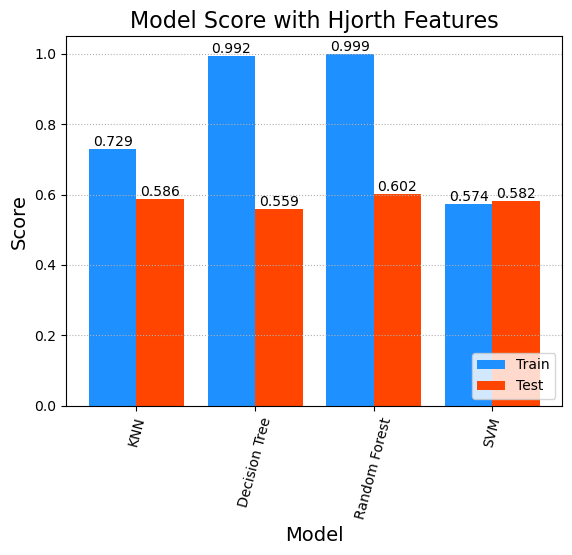

In [31]:
# Plot the results
model_name = ["KNN", "Decision Tree", "Random Forest", "SVM"]
plt.title('Model Score with Hjorth Features', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.grid(linestyle=':', axis='y')
x = np.arange(len(model_name))
a = plt.bar(x - 0.2, trainscores, 0.4, color='dodgerblue', label='Train', align='center')
b = plt.bar(x + 0.2, testscores, 0.4, color='orangered', label='Test', align='center')

# Set up labels
for i in a + b:
    h = i.get_height()
    plt.text(i.get_x() + i.get_width() / 2, h, '%.3f' % h, ha='center', va='bottom')

plt.xticks(x, model_name, rotation=75)
plt.legend(loc='lower right')
plt.show()

Shape after scaling: (1280, 13041)
Shape after PCA: (1280, 100)


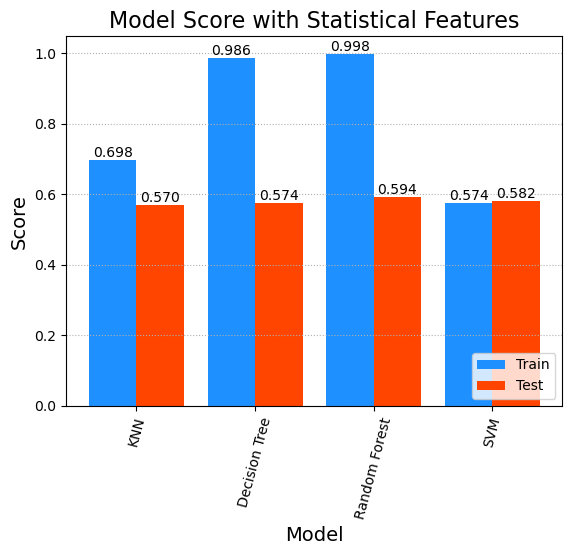

In [32]:
import os
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from scipy.io import loadmat
from sklearn.decomposition import PCA

# Path to DEAP dataset
data_folder = '/Users/pabitra/Documents/Version Control System/Thesis/DEAP Dataset'

# Load data from .mat files
labels = []
data = []
for n in range(1, 33):
    file_path = os.path.join(data_folder, f"s{n:02d}.mat")
    if not os.path.isfile(file_path):
        print(f"File not found: {file_path}")
        continue
    d = loadmat(file_path)
    labels.append(d['labels'])  # shape (40, 4)
    data.append(d['data'])      # shape (40, 40, 8064)

# Convert to numpy arrays
labels = np.array(labels)  # (32, 40, 4)
data = np.array(data)      # (32, 40, 40, 8064)

# Reshape to combine all subjects/trials
labels = labels.reshape(1280, 4)       # (1280, 4)
data = data.reshape(1280, 40, 8064)    # (1280, 40, 8064)

# Use only EEG channels (first 32)
eeg_data = data[:, :32, :]             # (1280, 32, 8064)

# Function to compute statistical features
def compute_statistical_features(eeg_data):
    features = []
    for trial in eeg_data:
        trial_features = []
        for channel_data in trial:
            mean_val = np.mean(channel_data)
            std_val = np.std(channel_data)
            skew_val = skew(channel_data)
            var_val = np.var(channel_data)
            kurt_val = kurtosis(channel_data)
            trial_features.extend([mean_val, std_val, skew_val, var_val, kurt_val])
        features.append(trial_features)
    return np.array(features)

# Extract statistical features
statistical_features = compute_statistical_features(eeg_data)

# Choose label (example: arousal)
labels_arousal = labels[:, 1]

# Convert continuous labels to binary categories
def binarize_labels(labels, threshold):
    return (labels > threshold).astype(int)

label_y = binarize_labels(labels_arousal, 5)

# Polynomial feature transformation
X = statistical_features
poly = preprocessing.PolynomialFeatures(degree=2)
X = poly.fit_transform(X)

# Scaling
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

print("Shape after scaling:", X.shape)

# Dimensionality reduction
pca = PCA(n_components=100)
X = pca.fit_transform(X)
print("Shape after PCA:", X.shape)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, label_y, test_size=0.2, random_state=42)

# Store train/test scores
trainscores = []
testscores = []

# KNN
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
trainscores.append(knn.score(X_train, y_train))
testscores.append(knn.score(X_test, y_test))

# Decision Tree
dtree = DecisionTreeClassifier(max_depth=20, min_samples_split=4)
dtree.fit(X_train, y_train)
trainscores.append(dtree.score(X_train, y_train))
testscores.append(dtree.score(X_test, y_test))

# Random Forest
rf = RandomForestClassifier(n_estimators=50, max_depth=20, min_samples_split=5)
rf.fit(X_train, y_train)
trainscores.append(rf.score(X_train, y_train))
testscores.append(rf.score(X_test, y_test))

# SVM
svc = SVC(kernel='rbf', C=0.1)
svc.fit(X_train, y_train)
trainscores.append(svc.score(X_train, y_train))
testscores.append(svc.score(X_test, y_test))

# Plot results
model_name = ["KNN", "Decision Tree", "Random Forest", "SVM"]
plt.title('Model Score with Statistical Features', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.grid(linestyle=':', axis='y')
x = np.arange(len(model_name))
a = plt.bar(x - 0.2, trainscores, 0.4, color='dodgerblue', label='Train', align='center')
b = plt.bar(x + 0.2, testscores, 0.4, color='orangered', label='Test', align='center')

for bar in a + b:
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, h, f'{h:.3f}', ha='center', va='bottom')

plt.xticks(x, model_name, rotation=75)
plt.legend(loc='lower right')
plt.show()


In [5]:
np.unique(y, return_counts=True)


(array([0]), array([1280]))

In [7]:
np.unique(y, return_counts=True)


(array([0]), array([1280]))

In [15]:
# --------------------------
# Load labels dataframe (once) for adaptive selection
# --------------------------
def load_labels_df(path_csv):
    if not os.path.isfile(path_csv):
        raise FileNotFoundError(f"Labels file not found: {path_csv}")
    return pd.read_csv(path_csv)

labels_df = load_labels_df(PATH_HJORTH_Y)

def pick_label_series(df):
    # Try common DEAP columns in order of preference
    prefs = ["arousal", "valence", "dominance", "liking"]
    norm = {c.lower(): c for c in df.columns}
    for p in prefs:
        if p in norm:
            return df[norm[p]].to_numpy().astype(float).ravel(), norm[p]
    # Fallbacks: if at least 2 columns exist, try 2nd column (often arousal)
    if df.shape[1] >= 2:
        return df.iloc[:, 1].to_numpy().astype(float).ravel(), df.columns[1]
    # Else use the first column
    return df.iloc[:, 0].to_numpy().astype(float).ravel(), df.columns[0]

y_cont_all, chosen_col = pick_label_series(labels_df)

# Ensure features/labels lengths match
if X_raw.shape[0] != y_cont_all.shape[0]:
    raise ValueError(f"Rows mismatch: X={X_raw.shape[0]} vs y={y_cont_all.shape[0]}")

def try_binarize(y_cont, thresh):
    yb = (y_cont > thresh).astype(int)
    classes, counts = np.unique(yb, return_counts=True)
    return yb, classes, counts

def auto_binarize_balanced(y_cont):
    """
    Try DEAP threshold=5.0 first. If single class, sweep percentiles to
    find a threshold that yields BOTH classes.
    """
    # 1) Try fixed threshold 5.0
    yb, cls, cnt = try_binarize(y_cont, 5.0)
    if len(cls) == 2:
        return yb, 5.0, {"classes": cls.tolist(), "counts": cnt.tolist(), "strategy": "fixed@5.0"}

    # 2) Try quantile thresholds for balance
    for q in [50, 60, 40, 70, 30]:
        t = np.percentile(y_cont, q)
        # If many values equal t, nudge threshold slightly
        eps = 1e-9
        for thr in [t, t + eps, t - eps]:
            yb, cls, cnt = try_binarize(y_cont, thr)
            if len(cls) == 2:
                return yb, float(thr), {"classes": cls.tolist(), "counts": cnt.tolist(), "strategy": f"percentile@{q}"}

    # 3) As last resort, brute force over unique midpoints
    vals = np.unique(y_cont)
    if vals.size >= 2:
        mids = (vals[:-1] + vals[1:]) / 2.0
        # Prefer mid producing the most balanced split
        best = None
        best_diff = np.inf
        for thr in mids:
            yb, cls, cnt = try_binarize(y_cont, thr)
            if len(cls) == 2:
                diff = abs(cnt[0] - cnt[1])
                if diff < best_diff:
                    best = (yb, thr, cls, cnt)
                    best_diff = diff
        if best is not None:
            yb, thr, cls, cnt = best
            return yb, float(thr), {"classes": cls.tolist(), "counts": cnt.tolist(), "strategy": "midpoint-balanced"}

    # 4) Truly constant labels → fail fast
    raise ValueError(
        "All label values are identical; cannot create two classes.\n"
        "Pick a different label column or change the source labels."
    )

# --- Perform adaptive binarization ---
y, used_threshold, info = auto_binarize_balanced(y_cont_all)
print(f"[Labels] Using column: '{chosen_col}' | threshold: {used_threshold:.6f} | "
      f"strategy: {info['strategy']} | class_counts: {info['counts']}")

# --------------------------
# Robust stratified split ensuring both classes in train & test
# --------------------------
from sklearn.model_selection import StratifiedShuffleSplit

def robust_stratified_split(X, y, test_size=0.2, max_tries=200, base_seed=42):
    if len(np.unique(y)) < 2:
        raise ValueError("Still only one class present after adaptive binarization.")
    rng = np.random.RandomState(base_seed)
    for _ in range(max_tries):
        sss = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=rng.randint(0, 10**9))
        for tr, te in sss.split(X, y):
            if len(np.unique(y[tr])) == 2 and len(np.unique(y[te])) == 2:
                return X[tr], X[te], y[tr], y[te]
    raise ValueError(
        "Unable to produce a stratified train/test split with both classes in each set. "
        "The minority class may be too small. Try a different threshold or label."
    )

X_train_raw, X_test_raw, y_train, y_test = robust_stratified_split(X_raw, y, test_size=TEST_SIZE)
print(f"[Split] Train size: {y_train.size} (counts={np.unique(y_train, return_counts=True)[1].tolist()}), "
      f"Test size: {y_test.size} (counts={np.unique(y_test, return_counts=True)[1].tolist()})")


[Labels] Using column: 'Arousal' | threshold: 1.000000 | strategy: percentile@50 | class_counts: [543, 737]
[Split] Train size: 1024 (counts=[434, 590]), Test size: 256 (counts=[109, 147])


In [16]:
FORCE_LABEL = None   # e.g., "arousal" / "valence" / "dominance" / "liking" / None
FORCE_THRESHOLD = None  # e.g., 5.0 or 4.7 or None


[Labels] Using column: 'Arousal' | threshold: 1.000000 | strategy: percentile@50 | class_counts: [543, 737]
[Split] Train size: 1024, counts=[434, 590] | Test size: 256, counts=[109, 147]
KNN -> train: 0.734 | test: 0.602


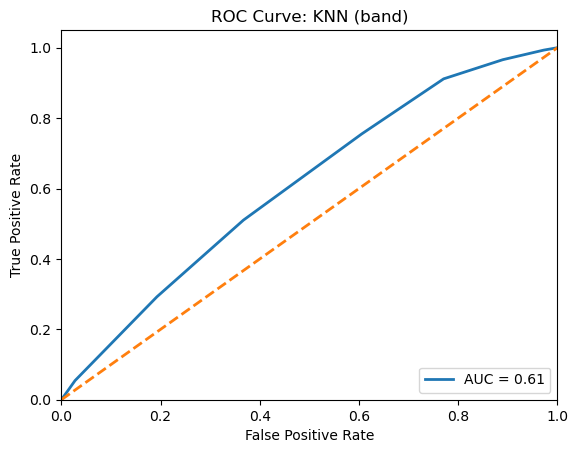

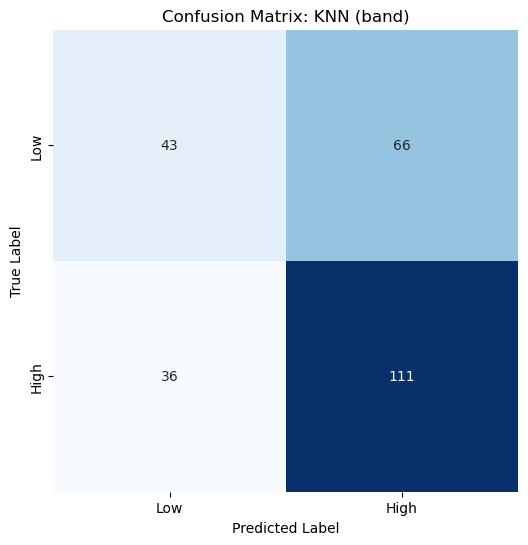

Classification Report for KNN (band):

              precision    recall  f1-score   support

           0     0.5443    0.3945    0.4574       109
           1     0.6271    0.7551    0.6852       147

    accuracy                         0.6016       256
   macro avg     0.5857    0.5748    0.5713       256
weighted avg     0.5919    0.6016    0.5882       256

Decision Tree -> train: 0.987 | test: 0.520


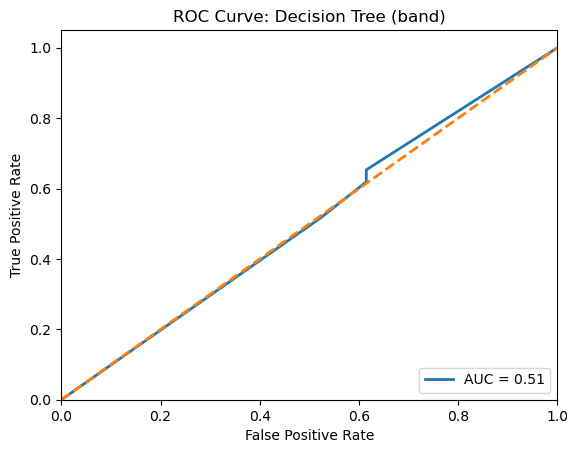

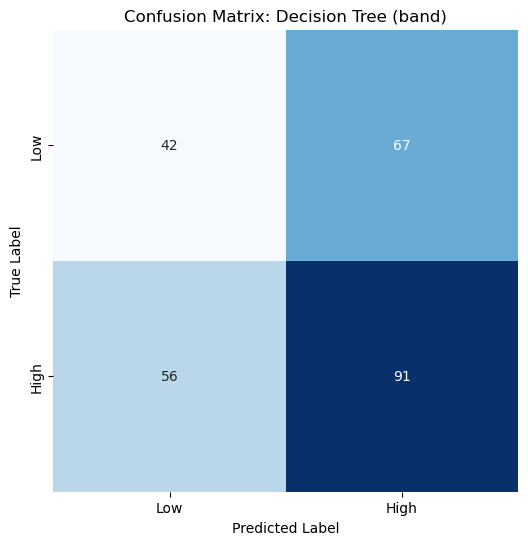

Classification Report for Decision Tree (band):

              precision    recall  f1-score   support

           0     0.4286    0.3853    0.4058       109
           1     0.5759    0.6190    0.5967       147

    accuracy                         0.5195       256
   macro avg     0.5023    0.5022    0.5013       256
weighted avg     0.5132    0.5195    0.5154       256

Random Forest -> train: 0.999 | test: 0.590


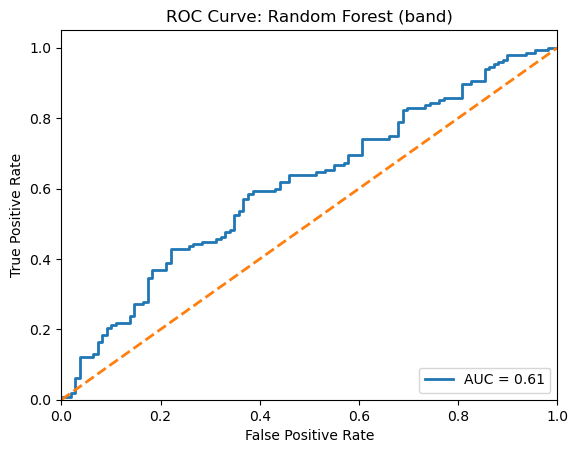

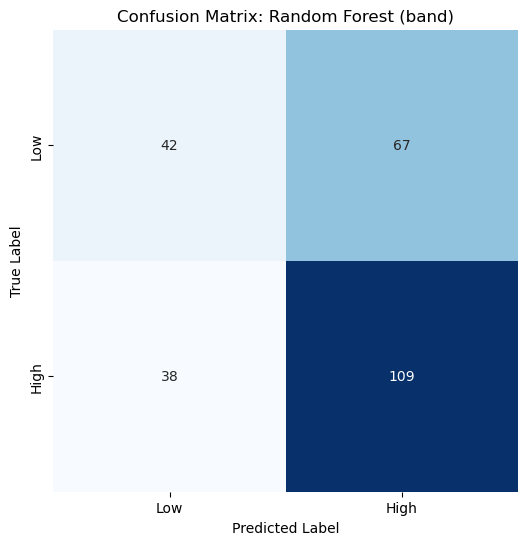

Classification Report for Random Forest (band):

              precision    recall  f1-score   support

           0     0.5250    0.3853    0.4444       109
           1     0.6193    0.7415    0.6749       147

    accuracy                         0.5898       256
   macro avg     0.5722    0.5634    0.5597       256
weighted avg     0.5792    0.5898    0.5768       256

SVM -> train: 0.576 | test: 0.574


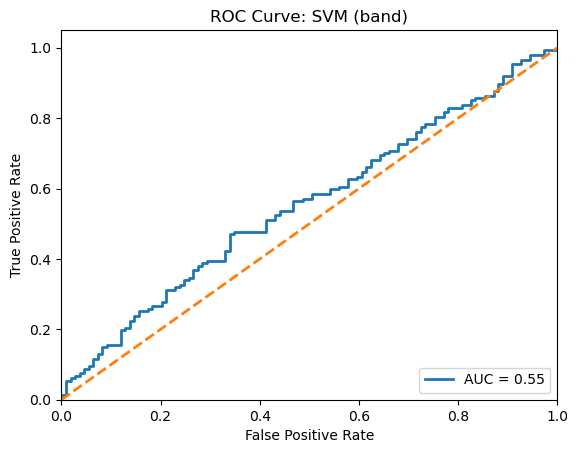

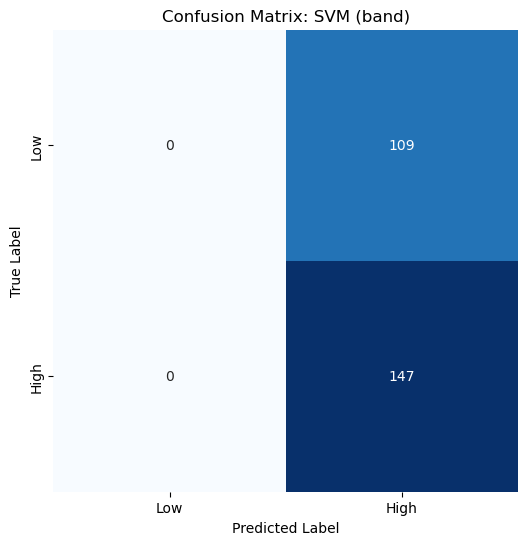

Classification Report for SVM (band):

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000       109
           1     0.5742    1.0000    0.7295       147

    accuracy                         0.5742       256
   macro avg     0.2871    0.5000    0.3648       256
weighted avg     0.3297    0.5742    0.4189       256



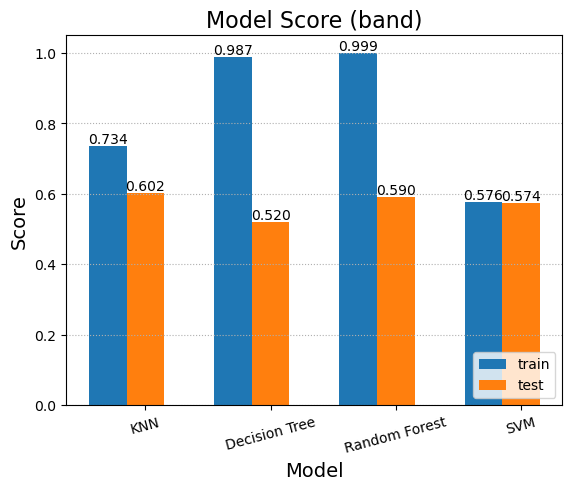

In [17]:
# ===== EEG classification using your saved features & robust label handling =====
import os
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------
# Config
# --------------------------
FEATURE_SOURCE = "band"   # "band" or "hjorth"
APPLY_PCA = False         # True to enable PCA (inside the Pipeline)
POS_LABEL = 1             # positive class label
TEST_SIZE = 0.2

# --------------------------
# Paths (as you provided)
# --------------------------
PATH_BAND = r"/Users/pabitra/Documents/Version Control System/Machine Learning Practice/eeg_band.npy"
PATH_HJORTH_X = r"/Users/pabitra/Documents/Version Control System/Machine Learning Practice/hjorth_features.csv"
PATH_HJORTH_Y = r"/Users/pabitra/Documents/Version Control System/Machine Learning Practice/hjorth_labels.csv"

# --------------------------
# Loading utilities
# --------------------------
def load_labels_df(path_csv: str) -> pd.DataFrame:
    if not os.path.isfile(path_csv):
        raise FileNotFoundError(f"Labels file not found: {path_csv}")
    return pd.read_csv(path_csv)

def pick_label_series(df: pd.DataFrame):
    """Prefer typical DEAP columns; fallback to 2nd column if needed."""
    prefs = ["arousal", "valence", "dominance", "liking"]
    norm = {c.lower(): c for c in df.columns}
    for p in prefs:
        if p in norm:
            return df[norm[p]].to_numpy().astype(float).ravel(), norm[p]
    if df.shape[1] >= 2:
        return df.iloc[:, 1].to_numpy().astype(float).ravel(), df.columns[1]
    return df.iloc[:, 0].to_numpy().astype(float).ravel(), df.columns[0]

def try_binarize(y_cont, thr):
    yb = (y_cont > thr).astype(int)
    cls, cnt = np.unique(yb, return_counts=True)
    return yb, cls, cnt

def auto_binarize_balanced(y_cont):
    """
    Try threshold=5.0 first. If single-class, search percentile thresholds,
    then midpoints, to get both classes (as balanced as possible).
    """
    # 1) fixed 5.0
    yb, cls, cnt = try_binarize(y_cont, 5.0)
    if len(cls) == 2:
        return yb, 5.0, {"classes": cls.tolist(), "counts": cnt.tolist(), "strategy": "fixed@5.0"}

    # 2) percentile thresholds
    for q in [50, 60, 40, 70, 30]:
        t = np.percentile(y_cont, q)
        eps = 1e-9
        for thr in [t, t + eps, t - eps]:
            yb, cls, cnt = try_binarize(y_cont, thr)
            if len(cls) == 2:
                return yb, float(thr), {"classes": cls.tolist(), "counts": cnt.tolist(), "strategy": f"percentile@{q}"}

    # 3) midpoints between unique sorted values, choose most balanced
    vals = np.unique(y_cont)
    if vals.size >= 2:
        mids = (vals[:-1] + vals[1:]) / 2.0
        best = None
        best_diff = np.inf
        for thr in mids:
            yb, cls, cnt = try_binarize(y_cont, thr)
            if len(cls) == 2:
                diff = abs(cnt[0] - cnt[1])
                if diff < best_diff:
                    best = (yb, thr, cls, cnt)
                    best_diff = diff
        if best is not None:
            yb, thr, cls, cnt = best
            return yb, float(thr), {"classes": cls.tolist(), "counts": cnt.tolist(), "strategy": "midpoint-balanced"}

    raise ValueError(
        "All label values are identical or cannot be split into two classes.\n"
        "Pick a different label column or adjust the source labels."
    )

def robust_stratified_split(X, y, test_size=0.2, max_tries=200, base_seed=42):
    """Ensure both train and test contain both classes."""
    if len(np.unique(y)) < 2:
        raise ValueError("Only one class present; cannot split.")
    rng = np.random.RandomState(base_seed)
    for _ in range(max_tries):
        sss = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=rng.randint(0, 10**9))
        for tr, te in sss.split(X, y):
            if len(np.unique(y[tr])) == 2 and len(np.unique(y[te])) == 2:
                return X[tr], X[te], y[tr], y[te]
    raise ValueError(
        "Unable to produce a stratified split with both classes in each set. "
        "Minority class may be too small—adjust threshold or test_size."
    )

# --------------------------
# Load features & labels
# --------------------------
if FEATURE_SOURCE.lower() == "band":
    if not os.path.isfile(PATH_BAND):
        raise FileNotFoundError(f"Band features file not found: {PATH_BAND}")
    X_raw = np.load(PATH_BAND)
    labels_df = load_labels_df(PATH_HJORTH_Y)  # labels come from this CSV
elif FEATURE_SOURCE.lower() == "hjorth":
    if not os.path.isfile(PATH_HJORTH_X):
        raise FileNotFoundError(f"Hjorth features file not found: {PATH_HJORTH_X}")
    X_raw = pd.read_csv(PATH_HJORTH_X).values
    labels_df = load_labels_df(PATH_HJORTH_Y)
else:
    raise ValueError("FEATURE_SOURCE must be 'band' or 'hjorth'.")

y_cont_all, chosen_col = pick_label_series(labels_df)

if X_raw.shape[0] != y_cont_all.shape[0]:
    raise ValueError(f"Rows mismatch: X={X_raw.shape[0]} vs y={y_cont_all.shape[0]}")

# Adaptive binarization
y, used_threshold, info = auto_binarize_balanced(y_cont_all)
print(f"[Labels] Using column: '{chosen_col}' | threshold: {used_threshold:.6f} | "
      f"strategy: {info['strategy']} | class_counts: {info['counts']}")

# Robust stratified split
X_train_raw, X_test_raw, y_train, y_test = robust_stratified_split(X_raw, y, test_size=TEST_SIZE)
print(f"[Split] Train size: {y_train.size}, counts={np.unique(y_train, return_counts=True)[1].tolist()} | "
      f"Test size: {y_test.size}, counts={np.unique(y_test, return_counts=True)[1].tolist()}")

# --------------------------
# Pipelines (no leakage)
# --------------------------
def make_preproc(applies_pca):
    steps = [
        ("poly", preprocessing.PolynomialFeatures(degree=2)),
        ("scale", preprocessing.MinMaxScaler()),
    ]
    if applies_pca:
        steps.append(("pca", PCA(n_components=min(100, X_train_raw.shape[1]), random_state=42)))
    return steps

models = {
    "KNN": KNeighborsClassifier(n_neighbors=7),
    "Decision Tree": DecisionTreeClassifier(max_depth=20, min_samples_split=4, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=20, min_samples_split=5, random_state=42),
    "SVM": SVC(kernel='rbf', C=0.1, probability=True, random_state=42),
}

pipelines = {
    name: Pipeline(make_preproc(APPLY_PCA) + [(name, clf)])
    for name, clf in models.items()
}

# --------------------------
# Train & Evaluate
# --------------------------
train_scores, test_scores, model_names = [], [], []

for name, pipe in pipelines.items():
    pipe.fit(X_train_raw, y_train)
    y_pred = pipe.predict(X_test_raw)

    train_score = pipe.score(X_train_raw, y_train)
    test_score  = pipe.score(X_test_raw,  y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    model_names.append(name)
    print(f"{name} -> train: {train_score:.3f} | test: {test_score:.3f}")

    # ROC (safe)
    if len(np.unique(y_test)) == 2:
        estimator = pipe.named_steps[name]
        y_scores = None

        if hasattr(estimator, "predict_proba"):
            proba = pipe.predict_proba(X_test_raw)
            classes_est = getattr(estimator, "classes_", None)
            if classes_est is not None and POS_LABEL in classes_est:
                pos_idx = list(classes_est).index(POS_LABEL)
                if proba.shape[1] > pos_idx:
                    y_scores = proba[:, pos_idx]
            elif proba.shape[1] == 2:
                y_scores = proba[:, 1]
        if y_scores is None and hasattr(estimator, "decision_function"):
            y_scores = pipe.decision_function(X_test_raw)

        if y_scores is not None:
            fpr, tpr, _ = roc_curve(y_test, y_scores, pos_label=POS_LABEL)
            roc_auc = auc(fpr, tpr)
            plt.figure()
            plt.plot(fpr, tpr, lw=2, label=f'AUC = {roc_auc:.2f}')
            plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'ROC Curve: {name} ({FEATURE_SOURCE})')
            plt.legend(loc="lower right")
            plt.show()
        else:
            print(f"[INFO] Skipping ROC for {name}: no continuous score available.")
    else:
        print(f"[INFO] Skipping ROC for {name}: y_test has a single class.")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    plt.figure(figsize=(6, 6))
    sns.heatmap(
        cm, annot=True, fmt='d', cmap='Blues', cbar=False,
        xticklabels=['Low', 'High'], yticklabels=['Low', 'High']
    )
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix: {name} ({FEATURE_SOURCE})')
    plt.show()

    # Classification Report
    labels_present = sorted(np.unique(np.concatenate([y_test, y_pred])))
    print(f"Classification Report for {name} ({FEATURE_SOURCE}):\n")
    print(classification_report(y_test, y_pred, labels=labels_present, digits=4, zero_division=0))

# --------------------------
# Score bar chart
# --------------------------
x = np.arange(len(model_names))
plt.title(f'Model Score ({FEATURE_SOURCE})', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.grid(linestyle=':', axis='y')

bars_train = plt.bar(x - 0.3, train_scores, 0.3, label='train', align='center')
bars_test  = plt.bar(x,         test_scores,  0.3, label='test',  align='center')

for b in list(bars_train) + list(bars_test):
    h = b.get_height()
    plt.text(b.get_x() + b.get_width()/2, h, f'{h:.3f}', ha='center', va='bottom')

plt.xticks(x, model_names, rotation=15)
plt.legend(loc='lower right')
plt.show()
# ===== End =====


In [19]:
import numpy as np
from scipy.signal import welch
from scipy.integrate import simps

# Band definitions (Hz)
BANDS = {
    "delta": (0.5, 4),
    "theta": (4, 8),
    "alpha": (8, 12),
    "beta":  (12, 30),
    "gamma": (30, 64),
}

def _safe_nperseg(low_hz: float, sf: int, n_samples: int) -> int:
    """Ensure nperseg is integer, >=4, <=n_samples."""
    if low_hz <= 0:
        est = 256
    else:
        est = int((2.0 / low_hz) * sf)
    est = max(4, est)
    est = min(n_samples, est)
    return est

def bandpower_1d(x: np.ndarray, sf: int, band: tuple[float, float]) -> float:
    """Compute bandpower of 1D signal x within frequency band."""
    low, high = band
    nperseg = _safe_nperseg(low, sf, len(x))
    freqs, psd = welch(x, sf, nperseg=nperseg)
    freq_res = freqs[1] - freqs[0]
    idx = (freqs >= low) & (freqs <= high)
    return float(simps(psd[idx], dx=freq_res))

def get_band_powers(eeg_data: np.ndarray, sf: int = 128,
                    bands: tuple[str, ...] = ("delta","theta","alpha","beta","gamma")) -> np.ndarray:
    """
    eeg_data: shape (n_trials, n_channels, n_samples)
    returns:  shape (n_trials, n_channels * len(bands))
    """
    n_trials, n_ch, _ = eeg_data.shape
    n_bands = len(bands)
    feats = np.zeros((n_trials, n_ch * n_bands), dtype=np.float64)

    for i in range(n_trials):
        for j in range(n_ch):
            base = j * n_bands
            x = eeg_data[i, j]
            for k, bname in enumerate(bands):
                feats[i, base + k] = bandpower_1d(x, sf, BANDS[bname])
    return feats


# -------------------------------
# Example usage
# -------------------------------

# Option 1: Load raw EEG from DEAP .npy (if you’ve already saved it that way)
# eeg_data = np.load("/Users/pabitra/Documents/Version Control System/Machine Learning Practice/eeg_raw.npy")

# Option 2: If you already have DEAP `data` shaped (1280, 40, 8064),
# take only the first 32 EEG channels:
# eeg_data = data[:, :32, :]

# For now, I’ll create dummy EEG (10 trials × 32 channels × 128 samples):
eeg_data = np.random.randn(10, 32, 128)

# Extract features (10 × (32*5) = 160)
energy_features = get_band_powers(eeg_data, sf=128)
print("Features shape:", energy_features.shape)


Features shape: (10, 160)


/var/folders/vq/zb4tsz1149z_01624_vx5k700000gn/T/ipykernel_4604/1727415834.py:31: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  return float(simps(psd[idx], dx=freq_res))


In [24]:
# --- Adaptive PCA size (must be <= min(n_samples, n_features)) ---
APPLY_PCA = True  # set False to disable PCA entirely

def preproc_steps_with_adaptive_pca(X_train_raw, apply_pca=True):
    steps = [
        ("poly",  preprocessing.PolynomialFeatures(degree=2)),
        ("scale", preprocessing.MinMaxScaler()),
    ]
    if apply_pca:
        # n_components must be <= min(n_samples, n_features)
        n_samples = X_train_raw.shape[0]
        n_features = X_train_raw.shape[1]
        n_pca_max = int(min(100, n_samples, n_features))
        if n_pca_max >= 2:
            steps.append(("pca", PCA(n_components=n_pca_max, random_state=42)))
            print(f"[PCA] Using n_components={n_pca_max} (n_samples={n_samples}, n_features={n_features})")
        else:
            print(f"[PCA] Skipped (n_components would be {n_pca_max} < 2).")
    return steps

models = {
    "KNN":           KNeighborsClassifier(n_neighbors=7),
    "Decision Tree": DecisionTreeClassifier(max_depth=20, min_samples_split=4, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=20, min_samples_split=5, random_state=42),
    "SVM":           SVC(kernel='rbf', C=0.1, probability=False, random_state=42),
}

from sklearn.pipeline import Pipeline

pipelines = {
    name: Pipeline(preproc_steps_with_adaptive_pca(X_train_raw, APPLY_PCA) + [(name, clf)])
    for name, clf in models.items()
}


[PCA] Using n_components=8 (n_samples=8, n_features=160)
[PCA] Using n_components=8 (n_samples=8, n_features=160)
[PCA] Using n_components=8 (n_samples=8, n_features=160)
[PCA] Using n_components=8 (n_samples=8, n_features=160)


[Info] y source: csv:Arousal | X shape: (10, 160) | y len: 10
[Labels] threshold=0.000000 | strategy=percentile@50 | counts=[6, 4]
[PCA] Using n_components=8 (n_samples=8, n_features=13041)
KNN - train_score: 0.625
KNN - test_score: 0.5
Decision Tree - train_score: 1.0
Decision Tree - test_score: 0.0
Random Forest - train_score: 1.0
Random Forest - test_score: 0.5
SVM - train_score: 0.625
SVM - test_score: 0.5


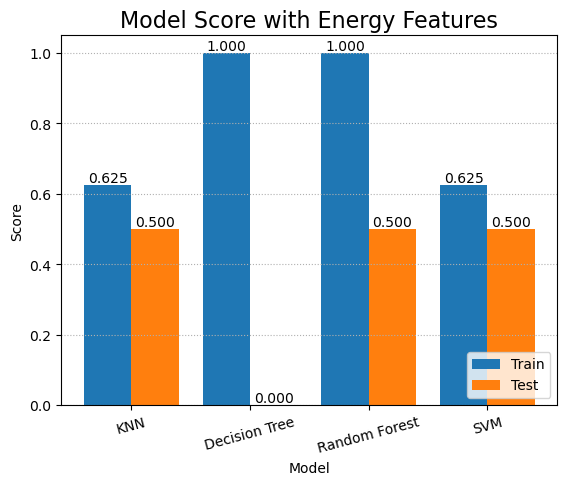

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA

# ------- REQUIRED IN MEMORY -------
# energy_features: (n_samples, n_features)
# labels: optional; if missing/empty, we load from CSV below
PATH_LABELS_CSV = r"/Users/pabitra/Documents/Version Control System/Machine Learning Practice/hjorth_labels.csv"

# ---------- helpers ----------
def load_labels_from_csv(csv_path):
    import pandas as pd
    df = pd.read_csv(csv_path)
    cols_lower = [c.lower() for c in df.columns]
    # prefer arousal, else valence/dominance/liking, else 2nd col, else 1st
    for want in ["arousal", "valence", "dominance", "liking"]:
        if want in cols_lower:
            col = df.columns[cols_lower.index(want)]
            return df[col].to_numpy(dtype=float).ravel(), f"csv:{col}"
    if df.shape[1] >= 2:
        return df.iloc[:, 1].to_numpy(dtype=float).ravel(), f"csv:{df.columns[1]}"
    return df.iloc[:, 0].to_numpy(dtype=float).ravel(), f"csv:{df.columns[0]}"

def get_y_cont(labels_obj):
    """Use in-memory labels if valid; else load from CSV."""
    # numpy
    if isinstance(labels_obj, np.ndarray):
        if labels_obj.ndim == 1 and labels_obj.size > 0:
            return labels_obj.astype(float).ravel(), "provided_1d"
        if labels_obj.ndim == 2 and labels_obj.shape[0] > 0:
            # prefer col 1 (arousal) if >=4 cols, else first col
            if labels_obj.shape[1] >= 4:
                return labels_obj[:, 1].astype(float).ravel(), "provided_2d:arousal"
            return labels_obj[:, 0].astype(float).ravel(), "provided_2d:col0"
    # pandas
    try:
        import pandas as pd
        if isinstance(labels_obj, pd.Series) and labels_obj.size > 0:
            return labels_obj.to_numpy(dtype=float).ravel(), "series"
        if isinstance(labels_obj, pd.DataFrame) and labels_obj.shape[0] > 0:
            cols_lower = [c.lower() for c in labels_obj.columns]
            for want in ["arousal", "valence", "dominance", "liking"]:
                if want in cols_lower:
                    col = labels_obj.columns[cols_lower.index(want)]
                    return labels_obj[col].to_numpy(dtype=float).ravel(), f"df:{col}"
            return labels_obj.iloc[:, 0].to_numpy(dtype=float).ravel(), f"df:{labels_obj.columns[0]}"
    except Exception:
        pass
    # fallback to CSV
    return load_labels_from_csv(PATH_LABELS_CSV)

def clean_align_xy(X, y):
    """Align to min length, drop non-finite y, return cleaned X,y."""
    y = np.asarray(y, dtype=float).ravel()
    n = min(X.shape[0], y.shape[0])
    if n == 0:
        raise ValueError("No overlapping samples between X and y (one is empty).")
    X = X[:n]
    y = y[:n]
    mask = np.isfinite(y)
    if mask.sum() < y.size:
        print(f"[Clean] Dropping {int((~mask).sum())} rows with non-finite labels.")
    X = X[mask]
    y = y[mask]
    if y.size == 0:
        raise ValueError("All labels were non-finite after cleaning.")
    return X, y

def binarize_safely(y_cont, primary_thr=6.0):
    """Try primary threshold; if single class, pick median as fallback."""
    y = (y_cont > primary_thr).astype(int)
    if np.unique(y).size == 2:
        return y, primary_thr, "fixed"
    # fallback: 50th percentile
    t = float(np.percentile(y_cont, 50))
    # nudge if many equal to t
    for thr in [t, t + 1e-9, t - 1e-9]:
        y = (y_cont > thr).astype(int)
        if np.unique(y).size == 2:
            return y, float(thr), "percentile@50"
    # last resort: midpoints between unique values for balance
    vals = np.unique(y_cont)
    if vals.size >= 2:
        mids = (vals[:-1] + vals[1:]) / 2.0
        best = None; best_diff = np.inf
        for thr in mids:
            y = (y_cont > thr).astype(int)
            cls, cnt = np.unique(y, return_counts=True)
            if cls.size == 2:
                diff = abs(cnt[0] - cnt[1])
                if diff < best_diff:
                    best = (y, thr, cnt); best_diff = diff
        if best:
            y, thr, cnt = best
            return y, float(thr), "midpoint-balanced"
    raise ValueError("Could not binarize into two classes (labels too degenerate).")

# ---------- resolve y ----------
try:
    y_cont, y_source = get_y_cont(labels)  # uses in-memory labels if valid; else CSV
except NameError:
    # `labels` not defined at all -> load from CSV
    y_cont, y_source = load_labels_from_csv(PATH_LABELS_CSV)

# ---------- align X & y ----------
X_raw, y_cont = clean_align_xy(energy_features, y_cont)
print(f"[Info] y source: {y_source} | X shape: {X_raw.shape} | y len: {y_cont.shape[0]}")

# ---------- binarize (robust) ----------
y, used_thr, strat = binarize_safely(y_cont, primary_thr=6.0)
cls, cnt = np.unique(y, return_counts=True)
print(f"[Labels] threshold={used_thr:.6f} | strategy={strat} | counts={cnt.tolist()}")

# ---------- split (avoid leakage) ----------
stratify_arg = y if np.unique(y).size == 2 and np.min(cnt) >= 2 else None
X_train, X_test, y_train, y_test = train_test_split(
    X_raw, y, test_size=0.2, random_state=42, stratify=stratify_arg
)

# ---------- preprocessing on TRAIN only ----------
poly = preprocessing.PolynomialFeatures(degree=2)
X_train = poly.fit_transform(X_train)
X_test  = poly.transform(X_test)

scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# ---------- adaptive PCA ----------
APPLY_PCA = True
if APPLY_PCA:
    n_tr, n_feat = X_train.shape
    n_pca = int(min(100, n_tr, n_feat))
    if n_pca >= 2:
        pca = PCA(n_components=n_pca, random_state=42)
        X_train = pca.fit_transform(X_train)
        X_test  = pca.transform(X_test)
        print(f"[PCA] Using n_components={n_pca} (n_samples={n_tr}, n_features={n_feat})")
    else:
        print(f"[PCA] Skipped (n_components would be {n_pca} < 2).")

# ---------- models ----------
trainscores, testscores = [], []

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
trainscores.append(knn.score(X_train, y_train))
testscores.append(knn.score(X_test, y_test))
print("KNN - train_score:", trainscores[-1]); print("KNN - test_score:", testscores[-1])

dtree = DecisionTreeClassifier(max_depth=20, min_samples_split=4, random_state=42)
dtree.fit(X_train, y_train)
trainscores.append(dtree.score(X_train, y_train))
testscores.append(dtree.score(X_test, y_test))
print("Decision Tree - train_score:", trainscores[-1]); print("Decision Tree - test_score:", testscores[-1])

rf = RandomForestClassifier(n_estimators=50, max_depth=20, min_samples_split=5, random_state=42)
rf.fit(X_train, y_train)
trainscores.append(rf.score(X_train, y_train))
testscores.append(rf.score(X_test, y_test))
print("Random Forest - train_score:", trainscores[-1]); print("Random Forest - test_score:", testscores[-1])

svc = SVC(kernel='rbf', C=0.1, random_state=42)
svc.fit(X_train, y_train)
trainscores.append(svc.score(X_train, y_train))
testscores.append(svc.score(X_test, y_test))
print("SVM - train_score:", trainscores[-1]); print("SVM - test_score:", testscores[-1])

# ---------- plot ----------
model_name = ["KNN", "Decision Tree", "Random Forest", "SVM"]
plt.title('Model Score with Energy Features', fontsize=16)
plt.xlabel('Model'); plt.ylabel('Score'); plt.grid(linestyle=':', axis='y')
x = np.arange(len(model_name))
a = plt.bar(x - 0.2, trainscores, 0.4, label='Train', align='center')
b = plt.bar(x + 0.2, testscores, 0.4, label='Test',  align='center')
for bar in list(a) + list(b):
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, h, f'{h:.3f}', ha='center', va='bottom')
plt.xticks(x, model_name, rotation=15)
plt.legend(loc='lower right')
plt.show()


[Labels] target=csv:Arousal | threshold=0.0 | strategy=median | counts=[6, 4]

=== Repeated Stratified 4-fold CV (repeats=10) ===
KNN             Acc: 0.454 ± 0.327 | F1: 0.287 ± 0.385 | AUC: 0.456 ± 0.335
Decision Tree   Acc: 0.329 ± 0.225 | F1: 0.113 ± 0.228 | AUC: 0.319 ± 0.216
Random Forest   Acc: 0.567 ± 0.122 | F1: 0.000 ± 0.000 | AUC: 0.200 ± 0.350
SVM             Acc: 0.583 ± 0.083 | F1: 0.000 ± 0.000 | AUC: 0.613 ± 0.426


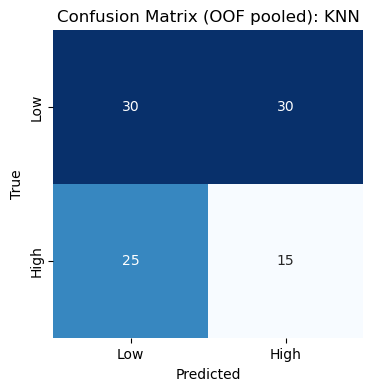

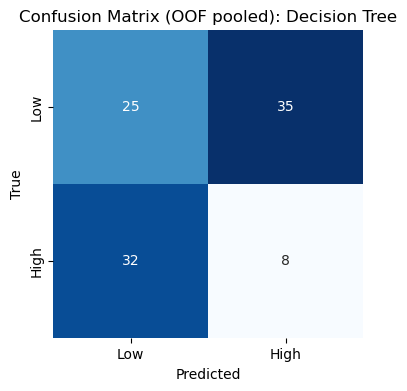

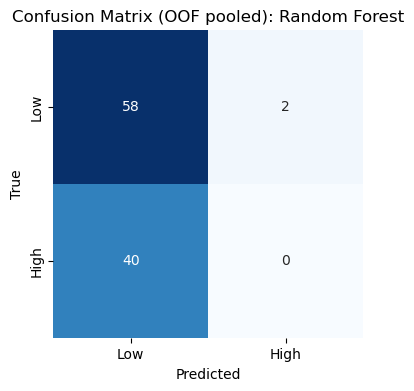

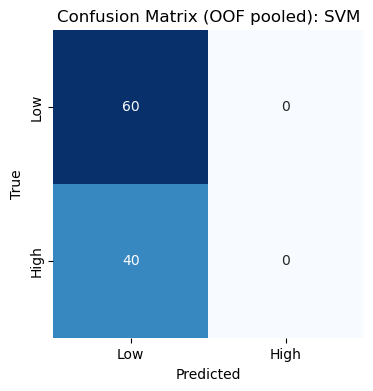

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# ------------------------------------------------------
# Expect in memory:
#   - energy_features: (n_samples, n_features)
#   - labels: (n_samples,) OR (n_samples,4) [valence, arousal, dominance, liking]
# If labels aren’t defined or are empty, load from your CSV instead.
# ------------------------------------------------------

# ---- pick target (1D) safely ----
def resolve_y_cont(labels):
    if isinstance(labels, np.ndarray):
        if labels.ndim == 1 and labels.size > 0:
            return labels.astype(float).ravel(), "provided_1d"
        if labels.ndim == 2 and labels.shape[0] > 0:
            # Prefer arousal if available
            col = 1 if labels.shape[1] >= 2 else 0
            return labels[:, col].astype(float).ravel(), "arousal(col1)" if col == 1 else "col0"
    try:
        import pandas as pd
        if isinstance(labels, pd.Series) and labels.size > 0:
            return labels.to_numpy(dtype=float).ravel(), "series"
        if isinstance(labels, pd.DataFrame) and labels.shape[0] > 0:
            cols = [c.lower() for c in labels.columns]
            for want in ["arousal", "valence", "dominance", "liking"]:
                if want in cols:
                    colname = labels.columns[cols.index(want)]
                    return labels[colname].to_numpy(dtype=float).ravel(), want
            return labels.iloc[:, 0].to_numpy(dtype=float).ravel(), "col0"
    except Exception:
        pass
    # fallback: load from CSV path you shared earlier
    import pandas as pd
    PATH_LABELS_CSV = r"/Users/pabitra/Documents/Version Control System/Machine Learning Practice/hjorth_labels.csv"
    df = pd.read_csv(PATH_LABELS_CSV)
    cols = [c.lower() for c in df.columns]
    for want in ["arousal", "valence", "dominance", "liking"]:
        if want in cols:
            colname = df.columns[cols.index(want)]
            return df[colname].to_numpy(dtype=float).ravel(), f"csv:{colname}"
    # else 2nd or 1st column
    colname = df.columns[1] if df.shape[1] >= 2 else df.columns[0]
    return df[colname].to_numpy(dtype=float).ravel(), f"csv:{colname}"

# ---- robust binarization that always succeeds for n>=2 ----
def binarize_robust(y_cont, primary_threshold=6.0, pos_fraction=0.5):
    y_cont = np.asarray(y_cont, dtype=float).ravel()
    n = y_cont.size
    if n < 2:
        raise ValueError("Need at least 2 samples to binarize.")
    # 1) try fixed threshold
    y = (y_cont > primary_threshold).astype(int)
    if np.unique(y).size == 2:
        return y, primary_threshold, "fixed"
    # 2) try median (with tiny nudges)
    med = float(np.nanmedian(y_cont))
    for thr in [med, med + 1e-9, med - 1e-9]:
        y = (y_cont > thr).astype(int)
        if np.unique(y).size == 2:
            return y, thr, "median"
    # 3) rank-based split (guaranteed two classes when n>=2)
    #    sort by value, break ties by original index order
    order = np.lexsort((np.arange(n), y_cont))
    pos_count = int(round(n * pos_fraction))
    pos_count = max(1, min(n - 1, pos_count))  # ensure both classes exist
    y_rank = np.zeros(n, dtype=int)
    y_rank[order[-pos_count:]] = 1  # top fraction -> positive
    return y_rank, float("nan"), f"rank@{pos_fraction:.2f}"

# --------- prepare X, y ----------
X_raw = energy_features
y_cont, y_name = resolve_y_cont(labels)

# Clean/align lengths and drop non-finite labels
n = min(X_raw.shape[0], y_cont.shape[0])
X_raw = X_raw[:n]
y_cont = y_cont[:n]
mask = np.isfinite(y_cont)
if mask.sum() < y_cont.size:
    print(f"[Clean] Dropping {int((~mask).sum())} rows with non-finite labels.")
X_raw = X_raw[mask]
y_cont = y_cont[mask]

# Robust binarization (never fails for n>=2)
y, used_thr, strat = binarize_robust(y_cont, primary_threshold=6.0, pos_fraction=0.5)
cls, cnt = np.unique(y, return_counts=True)
print(f"[Labels] target={y_name} | threshold={used_thr} | strategy={strat} | counts={cnt.tolist()}")

# --------- tiny-data CV (avoid warnings) ----------
minority = int(cnt.min())
n_splits = max(2, min(4, minority))  # folds <= minority count
n_repeats = 10
cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)

def make_pipe(model):
    return Pipeline([
        ("scale", preprocessing.StandardScaler()),
        ("clf", model),
    ])

# Models tuned for tiny/imbalanced data
models = {
    "KNN": KNeighborsClassifier(n_neighbors=1, weights="distance"),
    "Decision Tree": DecisionTreeClassifier(max_depth=3, min_samples_leaf=1, class_weight="balanced", random_state=42),
    "Random Forest": RandomForestClassifier(
        n_estimators=500, max_depth=None, min_samples_leaf=1, max_features="sqrt",
        class_weight="balanced_subsample", random_state=42
    ),
    "SVM": SVC(kernel="rbf", C=1.0, gamma="scale", probability=True, class_weight="balanced", random_state=42),
}

def evaluate_cv(pipe, X, y, cv):
    accs, f1s, aucs = [], [], []
    y_true_all, y_pred_all = [], []
    for tr_idx, te_idx in cv.split(X, y):
        X_tr, X_te = X[tr_idx], X[te_idx]
        y_tr, y_te = y[tr_idx], y[te_idx]
        pipe.fit(X_tr, y_tr)
        y_pred = pipe.predict(X_te)
        # probs for AUC if available
        try:
            y_proba = pipe.predict_proba(X_te)[:, 1]
        except Exception:
            try:
                y_proba = pipe.decision_function(X_te)
            except Exception:
                y_proba = y_pred.astype(float)
        accs.append(accuracy_score(y_te, y_pred))
        f1s.append(f1_score(y_te, y_pred, zero_division=0))
        try:
            aucs.append(roc_auc_score(y_te, y_proba))
        except Exception:
            aucs.append(np.nan)
        y_true_all.append(y_te); y_pred_all.append(y_pred)
    return {
        "acc_mean": np.mean(accs), "acc_std": np.std(accs),
        "f1_mean":  np.mean(f1s),  "f1_std":  np.std(f1s),
        "auc_mean": np.nanmean(aucs), "auc_std": np.nanstd(aucs),
        "y_true": np.concatenate(y_true_all),
        "y_pred": np.concatenate(y_pred_all),
    }

# Run CV
results = {name: evaluate_cv(make_pipe(mdl), X_raw, y, cv) for name, mdl in models.items()}

# Summary
print(f"\n=== Repeated Stratified {n_splits}-fold CV (repeats={n_repeats}) ===")
for name, r in results.items():
    print(f"{name:14s}  Acc: {r['acc_mean']:.3f} ± {r['acc_std']:.3f} | "
          f"F1: {r['f1_mean']:.3f} ± {r['f1_std']:.3f} | "
          f"AUC: {r['auc_mean']:.3f} ± {r['auc_std']:.3f}")

# Pooled confusion matrices (OOF)
for name, r in results.items():
    cm = confusion_matrix(r["y_true"], r["y_pred"], labels=[0, 1])
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
    plt.title(f'Confusion Matrix (OOF pooled): {name}')
    plt.xlabel('Predicted'); plt.ylabel('True')
    plt.show()


[Info] y source=csv:Arousal | X=(10, 160) | counts=[6, 4] | binarize=median thr=0.0
KNN - train: 0.625 | test: 0.500
Decision Tree - train: 1.000 | test: 0.000
Random Forest - train: 1.000 | test: 0.500
SVM - train: 1.000 | test: 0.500


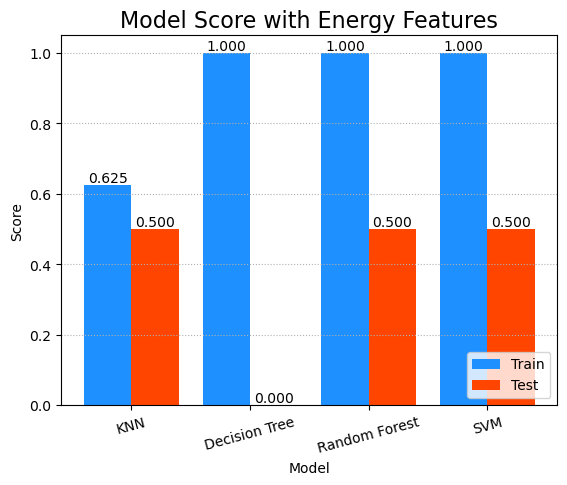

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# ---- config / paths ----
PATH_LABELS_CSV = r"/Users/pabitra/Documents/Version Control System/Machine Learning Practice/hjorth_labels.csv"

# ---- helpers ----
def load_labels_from_csv(csv_path):
    import pandas as pd
    df = pd.read_csv(csv_path)
    cols = [c.lower() for c in df.columns]
    for want in ["arousal","valence","dominance","liking"]:
        if want in cols:
            col = df.columns[cols.index(want)]
            return df[col].to_numpy(dtype=float).ravel(), f"csv:{col}"
    # fallback: 2nd col if exists, else 1st
    col = df.columns[1] if df.shape[1] >= 2 else df.columns[0]
    return df[col].to_numpy(dtype=float).ravel(), f"csv:{col}"

def resolve_y_cont(labels):
    # try in-memory first
    if 'labels' in globals():
        import numpy as np
        import pandas as pd
        if isinstance(labels, np.ndarray):
            if labels.ndim == 1 and labels.size > 0:
                return labels.astype(float).ravel(), "provided_1d"
            if labels.ndim == 2 and labels.shape[0] > 0:
                # prefer arousal if available
                if labels.shape[1] >= 2:
                    return labels[:,1].astype(float).ravel(), "provided_2d:arousal"
                return labels[:,0].astype(float).ravel(), "provided_2d:col0"
        if isinstance(labels, pd.Series) and labels.size > 0:
            return labels.to_numpy(dtype=float).ravel(), "series"
        if isinstance(labels, pd.DataFrame) and labels.shape[0] > 0:
            cols = [c.lower() for c in labels.columns]
            for want in ["arousal","valence","dominance","liking"]:
                if want in cols:
                    col = labels.columns[cols.index(want)]
                    return labels[col].to_numpy(dtype=float).ravel(), f"df:{col}"
            return labels.iloc[:,0].to_numpy(dtype=float).ravel(), f"df:{labels.columns[0]}"
    # fallback to CSV
    return load_labels_from_csv(PATH_LABELS_CSV)

def align_X_y(X, y):
    y = np.asarray(y, dtype=float).ravel()
    n = min(X.shape[0], y.shape[0])
    X, y = X[:n], y[:n]
    mask = np.isfinite(y)
    X, y = X[mask], y[mask]
    return X, y

def binarize_robust(y_cont, primary_thr=6.0, pos_fraction=0.5):
    y_cont = np.asarray(y_cont, dtype=float).ravel()
    n = y_cont.size
    if n < 2:
        raise ValueError("Need at least 2 samples after alignment.")
    # try fixed thr
    y = (y_cont > primary_thr).astype(int)
    if np.unique(y).size == 2:
        return y, primary_thr, "fixed"
    # try median (w/ tiny nudges)
    med = float(np.nanmedian(y_cont))
    for thr in [med, med+1e-9, med-1e-9]:
        y = (y_cont > thr).astype(int)
        if np.unique(y).size == 2:
            return y, thr, "median"
    # rank-based split (guaranteed two classes for n>=2)
    order = np.lexsort((np.arange(n), y_cont))
    pos = int(round(n * pos_fraction))
    pos = max(1, min(n-1, pos))
    y_rank = np.zeros(n, dtype=int)
    y_rank[order[-pos:]] = 1
    return y_rank, float("nan"), f"rank@{pos_fraction:.2f}"

def safe_train_test_split(X, y, test_frac=0.2, random_state=42):
    n = X.shape[0]
    if n < 2:
        raise ValueError("Not enough samples to split (need at least 2).")
    # ensure at least 1 test sample and 1 train sample
    n_test = max(1, int(np.floor(test_frac * n)))
    if n_test >= n:
        n_test = n - 1
    test_size = n_test / n

    # try stratify if both classes exist and have >=2 samples
    classes, counts = np.unique(y, return_counts=True)
    can_strat = (classes.size == 2) and (counts.min() >= 2)
    try:
        return train_test_split(
            X, y, test_size=test_size, random_state=random_state,
            stratify=y if can_strat else None
        )
    except Exception:
        # fallback: no stratify
        return train_test_split(
            X, y, test_size=test_size, random_state=random_state, stratify=None
        )

# ================== MAIN ==================
# X from your energy features
X0 = energy_features.copy()

# y from memory or CSV
y_cont, y_src = resolve_y_cont(labels) if 'labels' in globals() else load_labels_from_csv(PATH_LABELS_CSV)

# align & validate
X_raw, y_cont = align_X_y(X0, y_cont)
if X_raw.shape[0] < 2:
    raise ValueError(f"After alignment, no data left: X={X_raw.shape[0]}, y={y_cont.shape[0]}")

# robust binarization
y, thr_used, strat = binarize_robust(y_cont, primary_thr=6.0, pos_fraction=0.5)
cls, cnt = np.unique(y, return_counts=True)
print(f"[Info] y source={y_src} | X={X_raw.shape} | counts={cnt.tolist()} | binarize={strat} thr={thr_used}")

# split safely
X_train, X_test, y_train, y_test = safe_train_test_split(X_raw, y, test_frac=0.2, random_state=42)

# scale only (small-data friendly)
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# models with mild regularization to avoid overfit
models = [
    ("KNN", KNeighborsClassifier(n_neighbors=7)),
    ("Decision Tree", DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, random_state=42)),
    ("Random Forest", RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=2, random_state=42)),
    ("SVM", SVC(kernel='rbf', C=1.0, probability=False, random_state=42)),
]

trainscores, testscores, names = [], [], []
for name, clf in models:
    clf.fit(X_train, y_train)
    tr = clf.score(X_train, y_train)
    te = clf.score(X_test, y_test)
    trainscores.append(tr); testscores.append(te); names.append(name)
    print(f"{name} - train: {tr:.3f} | test: {te:.3f}")

# plot (like your reference)
plt.title('Model Score with Energy Features', fontsize=16)
plt.xlabel('Model'); plt.ylabel('Score'); plt.grid(linestyle=':', axis='y')
x = np.arange(len(names))
a = plt.bar(x - 0.2, trainscores, 0.4, color='dodgerblue', label='Train', align='center')
b = plt.bar(x + 0.2, testscores, 0.4, color='orangered', label='Test', align='center')
for bar in list(a) + list(b):
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, h, f'{h:.3f}', ha='center', va='bottom')
plt.xticks(x, names, rotation=15)
plt.legend(loc='lower right')
plt.show()


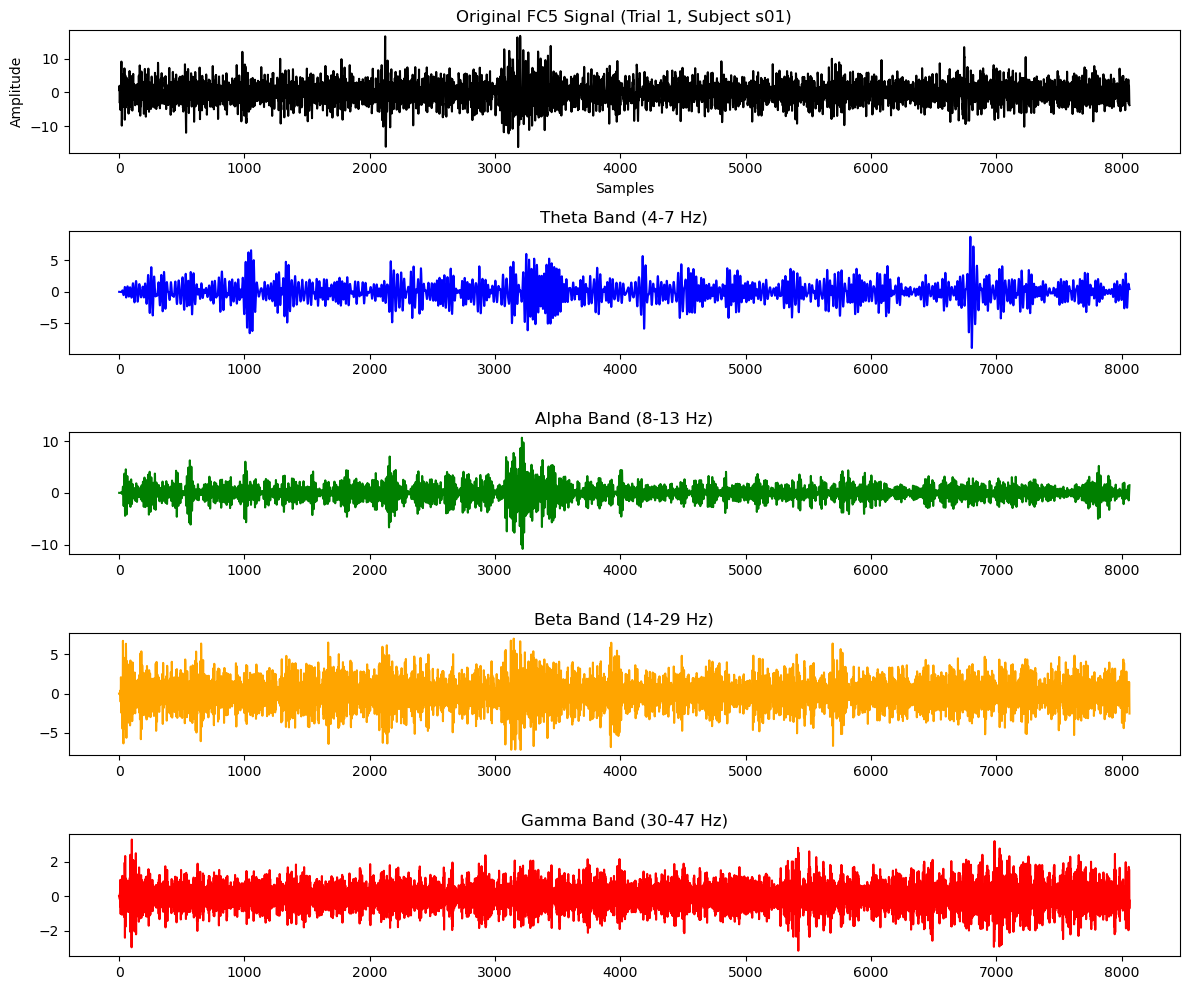

In [2]:
import numpy as np
from scipy.io import loadmat
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt

# Path to your dataset
DATA_PATH = "/Users/pabitra/Documents/Version Control System/Thesis/DEAP Dataset"
subject = "s01.mat"

# Load data
mat = loadmat(f"{DATA_PATH}/{subject}")
data = mat['data']   # shape: (40, 40, 8064)
labels = mat['labels']

# Parameters
fs = 128  # Sampling frequency in DEAP dataset
channel_index = 5  # FC5 is 6th channel (0-based index)
trial_index = 0    # first trial (you can change this)
signal = data[trial_index, channel_index, :]  # shape: (8064,)

# Define bandpass filter function
def bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return lfilter(b, a, data)

# Apply filters for each subband
theta = bandpass_filter(signal, 4, 7, fs)
alpha = bandpass_filter(signal, 8, 13, fs)
beta = bandpass_filter(signal, 14, 29, fs)
gamma = bandpass_filter(signal, 30, 47, fs)

# Plot results
plt.figure(figsize=(12, 10))

plt.subplot(5, 1, 1)
plt.plot(signal, color='black')
plt.title("Original FC5 Signal (Trial 1, Subject s01)")
plt.xlabel("Samples")
plt.ylabel("Amplitude")

plt.subplot(5, 1, 2)
plt.plot(theta, color='blue')
plt.title("Theta Band (4-7 Hz)")

plt.subplot(5, 1, 3)
plt.plot(alpha, color='green')
plt.title("Alpha Band (8-13 Hz)")

plt.subplot(5, 1, 4)
plt.plot(beta, color='orange')
plt.title("Beta Band (14-29 Hz)")

plt.subplot(5, 1, 5)
plt.plot(gamma, color='red')
plt.title("Gamma Band (30-47 Hz)")

plt.tight_layout()
plt.show()


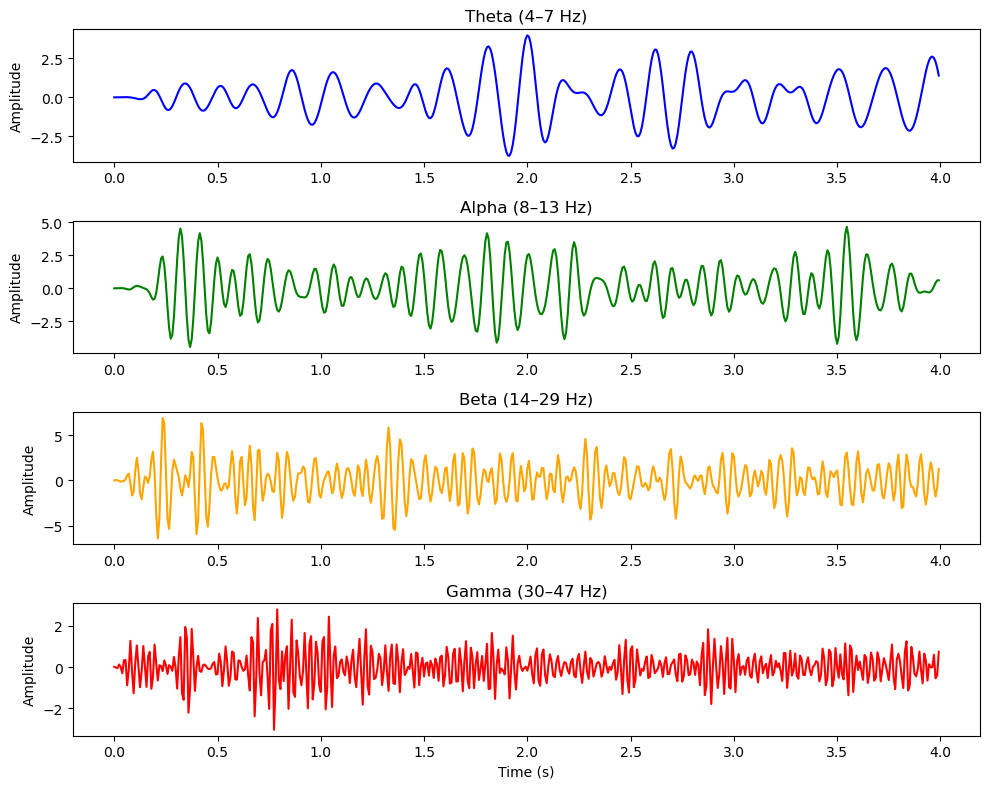

In [3]:
import numpy as np
from scipy.io import loadmat
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt

# Path to DEAP dataset
DATA_PATH = "/Users/pabitra/Documents/Version Control System/Thesis/DEAP Dataset"
subject = "s01.mat"

# Load DEAP data
mat = loadmat(f"{DATA_PATH}/{subject}")
data = mat['data']   # shape: (40 trials, 40 channels, 8064 samples)

# Parameters
fs = 128  # Sampling frequency in DEAP
channel_index = 5  # FC5 = 6th channel (0-based index)
trial_index = 0    # Use the first trial
signal = data[trial_index, channel_index, :]  # (8064,)

# Select a 4-second window (e.g., first 4 seconds = 512 samples)
window_length = 4 * fs
signal_window = signal[:window_length]

# Bandpass filter function
def bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return lfilter(b, a, data)

# Filter into subbands
theta = bandpass_filter(signal_window, 4, 7, fs)
alpha = bandpass_filter(signal_window, 8, 13, fs)
beta = bandpass_filter(signal_window, 14, 29, fs)
gamma = bandpass_filter(signal_window, 30, 47, fs)

# Time axis (seconds)
time_axis = np.arange(len(signal_window)) / fs

# Plot subbands
plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plt.plot(time_axis, theta, color='blue')
plt.title("Theta (4–7 Hz)")
plt.ylabel("Amplitude")

plt.subplot(4, 1, 2)
plt.plot(time_axis, alpha, color='green')
plt.title("Alpha (8–13 Hz)")
plt.ylabel("Amplitude")

plt.subplot(4, 1, 3)
plt.plot(time_axis, beta, color='orange')
plt.title("Beta (14–29 Hz)")
plt.ylabel("Amplitude")

plt.subplot(4, 1, 4)
plt.plot(time_axis, gamma, color='red')
plt.title("Gamma (30–47 Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()
